<a href="https://colab.research.google.com/github/TofayelAhamedTopu/Machine_Learning/blob/main/Human_Gender_Recognition_Using_Voice_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prayer Activity Recognition Using Smartphone/datafinal.csv')
voice.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label
0,-1.201795,-9.996614,0.222533,-0.007057,-0.007856,-0.008655,-21.154800,42.516998,-12.663600,Takbeer,A
1,-1.220938,-10.008579,0.244068,0.005726,-0.005726,-0.005459,-21.167000,42.553600,-12.761200,Takbeer,A
2,-1.161117,-10.057034,0.193819,0.020639,0.009188,-0.001198,-21.191401,42.577999,-12.956400,Takbeer,A
3,-1.173081,-9.970294,0.296710,0.024900,-0.002530,0.005193,-21.191401,42.577999,-12.907599,Takbeer,A
4,-1.002593,-9.975080,0.234497,0.040878,-0.025965,0.021172,-21.227999,42.565800,-12.895400,Takbeer,A


In [ ]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18089 entries, 0 to 18088
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Acc_X      18089 non-null  float64
 1   Acc_Y      18089 non-null  float64
 2   Acc_Z      18089 non-null  float64
 3   Gyro_X     18089 non-null  float64
 4   Gyro_Y     18089 non-null  float64
 5   Gyro_Z     18089 non-null  float64
 6   Mag_X      18089 non-null  float64
 7   Mag_Y      18089 non-null  float64
 8   Mag_Z      18089 non-null  float64
 9   Activity   18089 non-null  object 
 10  Label      18089 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.5+ MB


In [ ]:
voice['label'].value_counts()

male      442
female    218
Name: label, dtype: int64

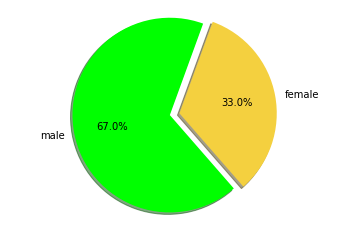

In [ ]:
labels = 'male', 'female'
sizes = [442,218]
colors = ['#00FF00','#F4D03F']
explode = (0, 0.1)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=70)

plt.axis('equal')
plt.show()

In [ ]:
# We can compare other features by simply change "meanfun" and "meanfreq"
sns.FacetGrid(voice, hue="label", size=5)\
   .map(plt.scatter, "meanfun","Q25")\
   .add_legend()
plt.show()

NameError: ignored

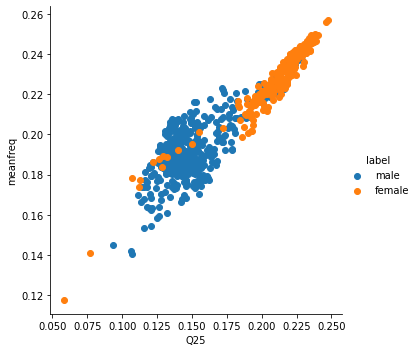

In [ ]:
# We can compare other features by simply change "meanfun" and "meanfreq"
sns.FacetGrid(voice, hue="label", size=5)\
   .map(plt.scatter,"Q25","meanfreq")\
   .add_legend()
plt.show()

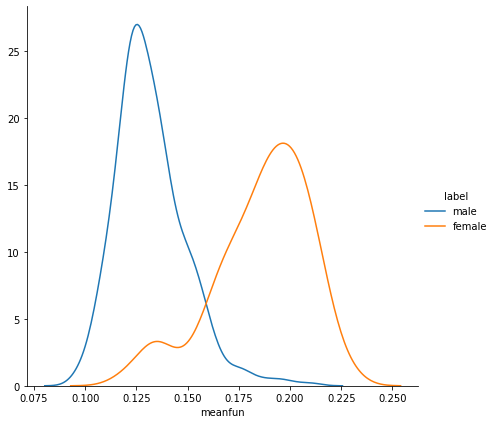

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.FacetGrid(voice, hue="label",size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

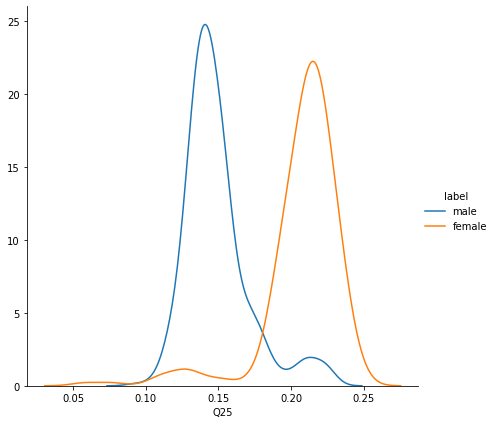

In [ ]:
# We can visualize other features by substituting Q25
sns.FacetGrid(voice, hue="label", size=6) \
   .map(sns.kdeplot, "Q25") \
   .add_legend()
plt.show()

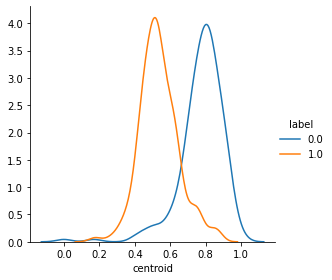

In [ ]:
# We can visualize other features by substituting centroid
sns.FacetGrid(voice, hue="label", size=4) \
   .map(sns.kdeplot,"centroid") \
   .add_legend()
plt.show()

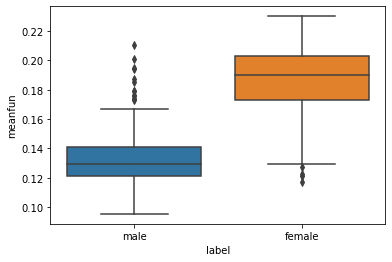

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.boxplot(x="label",y="meanfun",data=voice)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["Label"] = le.fit_transform(voice["Label"])
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [ ]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.614220,0.648177,0.788422,0.410229,0.838379,0.827376,0.195345,0.031463,0.677143,0.450914,0.898551,0.614220,0.184105,0.002927,0.973058,0.220561,1.0,0.021871,0.030003,0.632283,1.0
1,0.447321,0.522280,0.428152,0.453203,0.535645,0.509342,0.171921,0.033366,0.766486,0.518092,0.433701,0.447321,0.322463,0.004193,0.934320,0.259311,1.0,0.169864,0.176766,0.244744,1.0
2,0.265544,0.715027,0.372612,0.331664,0.210938,0.426483,0.130413,0.021599,0.911264,0.865920,0.438460,0.265544,0.243239,0.754106,1.000000,0.177350,1.0,0.175147,0.182005,0.196347,1.0
3,0.571632,0.637845,0.504849,0.434748,0.880371,0.824533,0.226150,0.038092,0.531629,0.293391,0.962146,0.571632,0.298080,0.011078,0.860654,0.310857,1.0,0.149815,0.156884,0.370323,1.0
4,0.521884,0.733728,0.531590,0.445558,0.839844,0.774167,0.276740,0.059042,0.763011,0.664665,0.970582,0.521884,0.251785,0.748333,1.000000,0.278915,1.0,0.149025,0.156100,0.211448,1.0


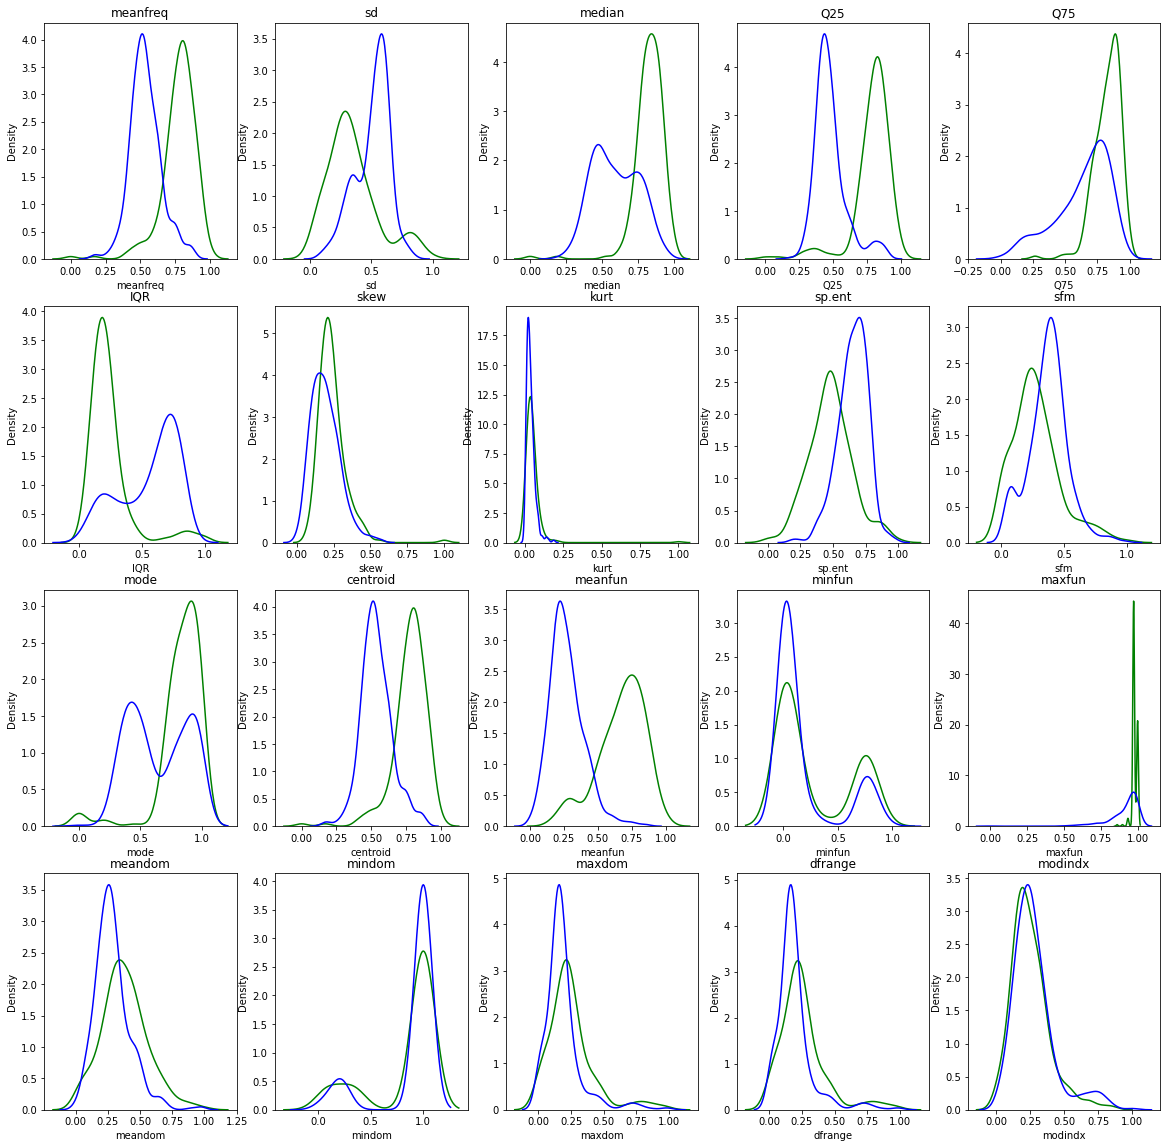

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost
from sklearn.metrics import classification_report

In [ ]:
train, test = train_test_split(voice, test_size=0.3)

In [ ]:
train.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label
10403,0.643071,-10.037891,0.601197,-0.029427,-0.062982,0.049933,26.657000,39.003399,21.154800,Rukku_head_down,3
5587,0.290728,-10.126426,0.162712,-0.000666,-0.010785,-0.001198,-28.450399,42.028999,-19.617599,Qayyam,1
11624,-0.547358,-10.071390,-0.695115,-0.112515,-0.012117,-0.047003,-24.094999,40.540600,-7.356600,Rukku_up,4
3950,1.335195,-9.996614,-0.726222,0.002530,0.010253,-0.000133,25.595600,42.956200,30.646399,Qayyam,1
1049,1.004985,-10.167104,-0.381057,0.003595,0.027563,0.004128,28.291800,42.138798,26.827799,Takbeer,0


In [ ]:
x_train = train.iloc[:, :-2]
y_train = train["Label"]
x_test = test.iloc[:, :-2]
y_test = test["Label"]
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

# Creating a Dictionaire
model_accuracy = {}

In [ ]:
x_train3 = train[["meanfun","Q25","meanfreq","centroid"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","Q25","meanfreq","centroid"]]
y_test3 = test["label"]

In [ ]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, digits=4))

##K-Nearest Neighbors

In [ ]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.012161415146489774 occurs at k=1.


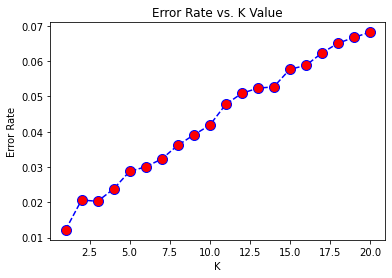

In [ ]:
k=knn_error(21,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0     0.9595    0.9416    0.9505       377
           1     0.9876    0.9901    0.9888      2326
           2     0.9450    0.9356    0.9403       202
           3     0.9919    0.9951    0.9935       612
           4     0.9939    0.9878    0.9908       164
           5     0.9961    1.0000    0.9981       774
           6     0.9872    0.9872    0.9872        78
           7     0.9989    0.9978    0.9983       894

    accuracy                         0.9878      5427
   macro avg     0.9825    0.9794    0.9809      5427
weighted avg     0.9878    0.9878    0.9878      5427



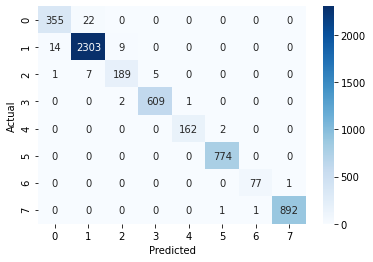

K-Nearest Neighbors: 0.9878385848535103


In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "K-Nearest Neighbors: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['K-Nearest Neighbors'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97828662, 0.98105014, 0.98380727, 0.9849921 , 0.97472354])

In [ ]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

NameError: ignored

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: ignored

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.91397849, 0.95698925, 0.95652174, 0.98913043, 0.9673913 ])

##Naive Bayes

              precision    recall  f1-score   support

           0     0.4425    0.2653    0.3317       377
           1     0.8660    0.9506    0.9063      2326
           2     0.2953    0.2178    0.2507       202
           3     0.7846    0.9167    0.8455       612
           4     0.2692    0.2988    0.2832       164
           5     0.6040    0.5065    0.5509       774
           6     0.2963    0.6154    0.4000        78
           7     0.6233    0.5515    0.5852       894

    accuracy                         0.7183      5427
   macro avg     0.5227    0.5403    0.5192      5427
weighted avg     0.7026    0.7183    0.7055      5427



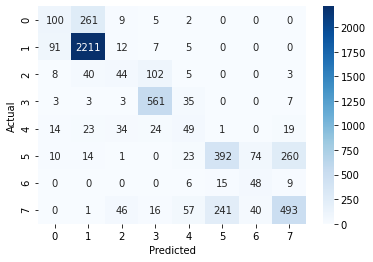

Naive Bayes: 0.7182605491063202


In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Naive Bayes: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.71022503, 0.73351757, 0.69905213, 0.73341232, 0.72393365])

              precision    recall  f1-score   support

      female     0.8833    0.8833    0.8833        60
        male     0.9493    0.9493    0.9493       138

    accuracy                         0.9293       198
   macro avg     0.9163    0.9163    0.9163       198
weighted avg     0.9293    0.9293    0.9293       198



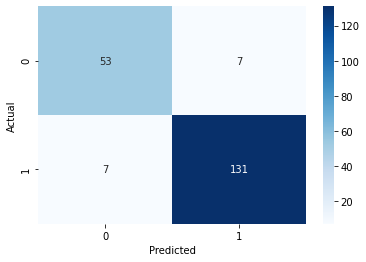

In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.89247312, 0.93548387, 0.93478261, 0.94565217, 0.88043478])

##Decision Tree

In [ ]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.2242491247466372 occurs at n=9.


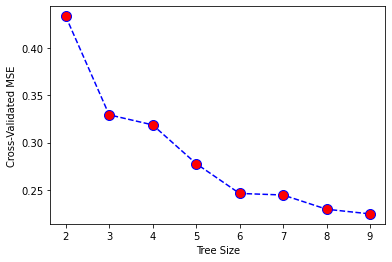

In [ ]:
n=dt_error(10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       377
           1     0.8115    0.9957    0.8942      2326
           2     0.0000    0.0000    0.0000       202
           3     0.7867    0.9281    0.8516       612
           4     0.5000    0.3598    0.4184       164
           5     0.6775    0.8333    0.7474       774
           6     0.0000    0.0000    0.0000        78
           7     0.7964    0.6957    0.7427       894

    accuracy                         0.7758      5427
   macro avg     0.4465    0.4766    0.4568      5427
weighted avg     0.6795    0.7758    0.7209      5427



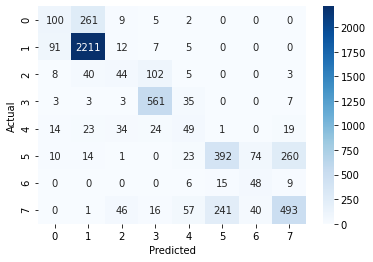

Decision Tree: 0.7182605491063202


In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Decision Tree: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Decision Tree'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.71022503, 0.73351757, 0.69905213, 0.73341232, 0.72393365])

Lowest error is 0.025252525252525252 occurs at n=3.


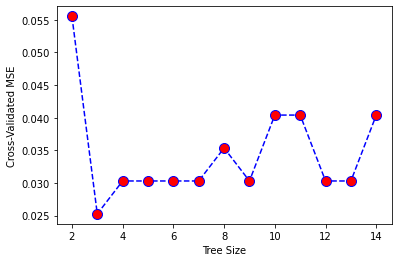

In [ ]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     1.0000    0.9167    0.9565        60
        male     0.9650    1.0000    0.9822       138

    accuracy                         0.9747       198
   macro avg     0.9825    0.9583    0.9694       198
weighted avg     0.9756    0.9747    0.9744       198



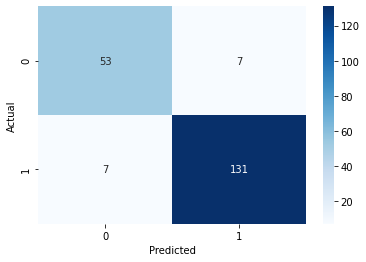

In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.89247312, 0.93548387, 0.93478261, 0.94565217, 0.88043478])

##Random Forest

In [ ]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.025244149622259075 occurs at n=81.


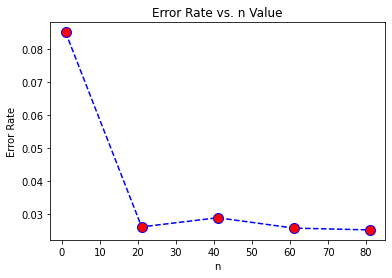

In [ ]:
e=rf_error(100,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0     0.9716    0.9072    0.9383       377
           1     0.9772    0.9953    0.9862      2326
           2     0.9348    0.8515    0.8912       202
           3     0.9726    0.9853    0.9789       612
           4     0.9874    0.9573    0.9721       164
           5     0.9883    0.9806    0.9844       774
           6     0.9467    0.9103    0.9281        78
           7     0.9789    0.9855    0.9822       894

    accuracy                         0.9766      5427
   macro avg     0.9697    0.9466    0.9577      5427
weighted avg     0.9764    0.9766    0.9763      5427



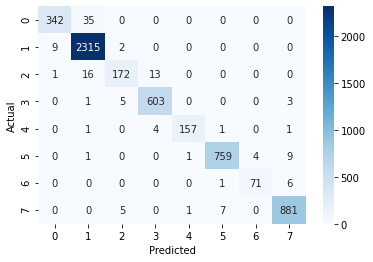

Random Forest: 0.9765984890363


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Random Forest: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97039084, 0.97118042, 0.97472354, 0.97709321, 0.96721959])

In [ ]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

NameError: ignored

              precision    recall  f1-score   support

      female     0.9815    0.8833    0.9298        60
        male     0.9514    0.9928    0.9716       138

    accuracy                         0.9596       198
   macro avg     0.9664    0.9380    0.9507       198
weighted avg     0.9605    0.9596    0.9590       198



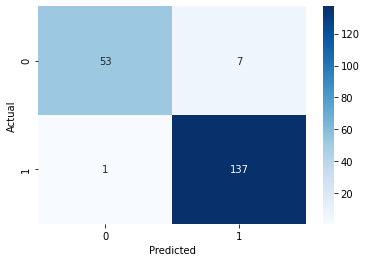

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.92473118, 0.97849462, 0.95652174, 0.98913043, 0.95652174])

##XgBoost

              precision    recall  f1-score   support

           0     0.8880    0.6101    0.7233       377
           1     0.9218    0.9936    0.9563      2326
           2     0.8655    0.5099    0.6417       202
           3     0.9073    0.9592    0.9325       612
           4     0.8647    0.7012    0.7744       164
           5     0.9306    0.9535    0.9419       774
           6     0.9242    0.7821    0.8472        78
           7     0.9280    0.9374    0.9327       894

    accuracy                         0.9182      5427
   macro avg     0.9038    0.8059    0.8438      5427
weighted avg     0.9163    0.9182    0.9127      5427



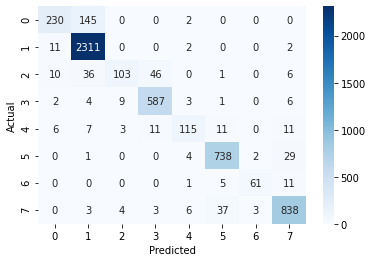

XgBoost: 0.9181868435599779


In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "XgBoost: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['XgBoost'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.91393604, 0.91590999, 0.9293049 , 0.921406  , 0.91903633])

In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: ignored

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.94623656, 0.97849462, 0.9673913 , 0.98913043, 0.95652174])

##Support Vector Machine

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.7813141683778234
rbf  out-of-sample accuracy in SVM:  0.775382347521651
poly  in-sample accuracy in SVM:  0.7441162533564998
poly  out-of-sample accuracy in SVM:  0.7423991155334438
linear  in-sample accuracy in SVM:  0.7098404675406729
linear  out-of-sample accuracy in SVM:  0.7038879675695596
Highest accuracy is 0.775382347521651 occurs at rbf kernel.


Lowest error is 0.16528468767274737 occurs at C=9.


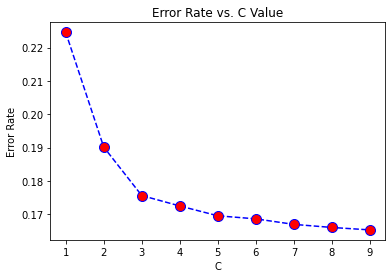

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       377
           1     0.8165    0.9987    0.8985      2326
           2     0.5714    0.0198    0.0383       202
           3     0.7599    0.9673    0.8512       612
           4     0.6138    0.5427    0.5761       164
           5     0.9049    0.9096    0.9072       774
           6     0.9677    0.3846    0.5505        78
           7     0.9392    0.8814    0.9094       894

    accuracy                         0.8347      5427
   macro avg     0.6967    0.5880    0.5914      5427
weighted avg     0.7732    0.8347    0.7870      5427



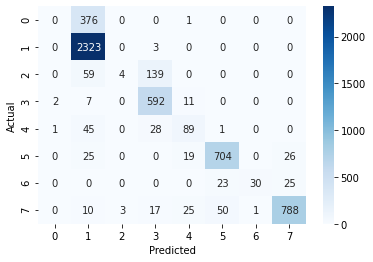

SVM: 0.8347153123272526


In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "SVM: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['SVM'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.83339913, 0.84287406, 0.84004739, 0.84320695, 0.84083728])

In [ ]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.961038961038961
rbf  out-of-sample accuracy in SVM:  0.9545454545454546
poly  in-sample accuracy in SVM:  0.9545454545454546
poly  out-of-sample accuracy in SVM:  0.9595959595959596
linear  in-sample accuracy in SVM:  0.9545454545454546
linear  out-of-sample accuracy in SVM:  0.9393939393939394
Highest accuracy is 0.9595959595959596 occurs at poly kernel.


Lowest error is 0.03535353535353535 occurs at C=6.


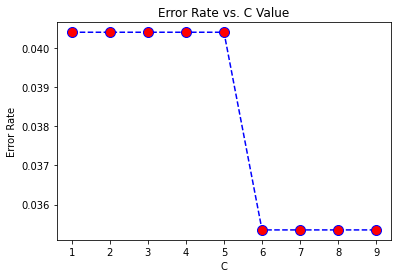

In [ ]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9818    0.9000    0.9391        60
        male     0.9580    0.9928    0.9751       138

    accuracy                         0.9646       198
   macro avg     0.9699    0.9464    0.9571       198
weighted avg     0.9652    0.9646    0.9642       198



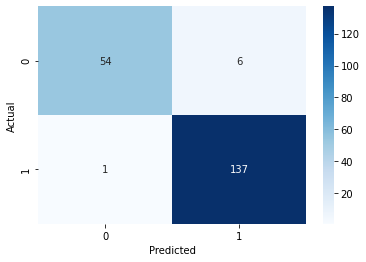

In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.91397849, 0.96774194, 0.9673913 , 0.97826087, 0.95652174])

##Neural Network

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.12861617836742215 occurs at C=19.


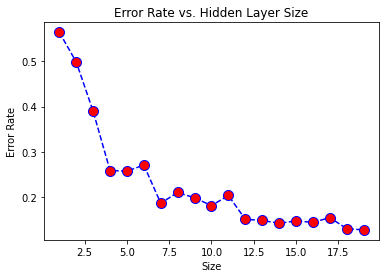

In [ ]:
h=nn_error(20,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0     0.7680    0.3687    0.4982       377
           1     0.8812    0.9884    0.9317      2326
           2     0.5565    0.3168    0.4038       202
           3     0.8301    0.9183    0.8720       612
           4     0.7500    0.5488    0.6338       164
           5     0.9239    0.9096    0.9167       774
           6     0.6875    0.5641    0.6197        78
           7     0.9199    0.9251    0.9225       894

    accuracy                         0.8714      5427
   macro avg     0.7896    0.6925    0.7248      5427
weighted avg     0.8612    0.8714    0.8581      5427



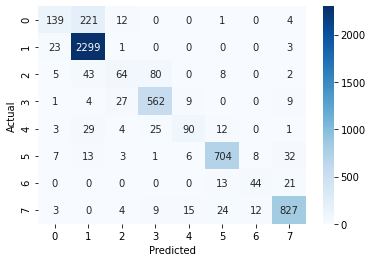

In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.91397849, 0.97849462, 0.98913043, 1.        , 0.94565217])

Lowest error is 0.06060606060606061 occurs at C=1.


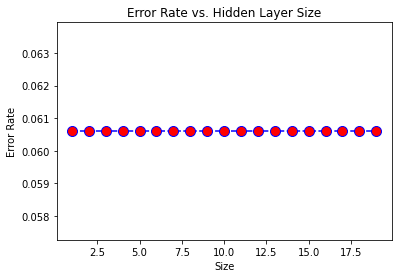

In [ ]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9615    0.8333    0.8929        60
        male     0.9315    0.9855    0.9577       138

    accuracy                         0.9394       198
   macro avg     0.9465    0.9094    0.9253       198
weighted avg     0.9406    0.9394    0.9381       198



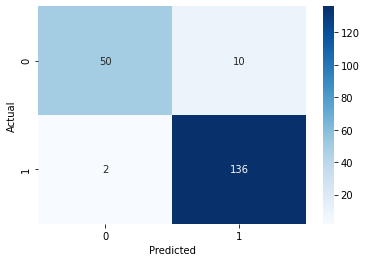

In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.92473118, 0.95698925, 0.9673913 , 0.98913043, 0.94565217])

##Feature Importances

In [ ]:
X = voice.iloc[:, : -1].values

y = voice.iloc[:, 20].values 

In [ ]:
#Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(x_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Calculating the Performance of Random Forest Classification
from sklearn import metrics
print( "Accuracy of Random Forest Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Random Forest Classification: 0.9797979797979798


In [ ]:
#Feature Importances               
header = list(voice)

classifier.fit(x_train, y_train)
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

#Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature meanfun (0.204629)
2. Feature Q25 (0.156607)
3. Feature centroid (0.111401)
4. Feature meanfreq (0.101057)
5. Feature IQR (0.060428)
6. Feature median (0.058918)
7. Feature sd (0.054130)
8. Feature maxfun (0.037923)
9. Feature sfm (0.033775)
10. Feature mode (0.032290)
11. Feature sp.ent (0.027331)
12. Feature minfun (0.027217)
13. Feature Q75 (0.022738)
14. Feature meandom (0.013762)
15. Feature modindx (0.011474)
16. Feature kurt (0.010287)
17. Feature maxdom (0.009774)
18. Feature mindom (0.009306)
19. Feature skew (0.008713)
20. Feature dfrange (0.008240)


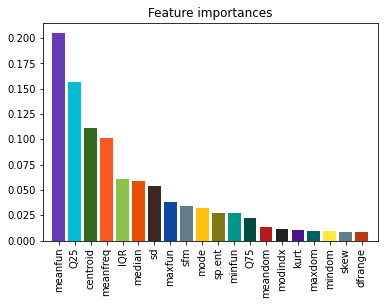

In [ ]:
# Plot the feature importances of the forest with Material Design
import random 
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#3F51B5', '#2196F3',
          '#03A9F4' ,'#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B',
          '#FFC107', '#FF9800', '#FF5722', '#795548', '#607D8B', '#B71C1C', '#880E4F',
          '#4A148C', '#311B92', '#1A237E', '#0D47A1', '#01579B', '#006064', '#004D40',
          '#1B5E20', '#33691E', '#827717', '#F57F17', '#FF6F00', '#E65100', '#BF360C',
          '#3E2723', '#212121', '#607D8B']

random_colors = random.sample(colors, 20)

plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=random_colors, align="center")
plt.xticks(range(X.shape[1]),header1, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()